<a href="https://colab.research.google.com/github/leifblake/cgt370lab6/blob/main/Blake_Leif_Lab6_CGT370.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Motor_Vehicle_Collisions_-_Crashes_20250127.csv'

df = pd.read_csv(file_path)

Mounted at /content/drive


<ipython-input-1-b0249c3b919e>:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<ipython-input-3-b8b0b883b93c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=collisions_per_borough.index, y=collisions_per_borough.values, palette='viridis')


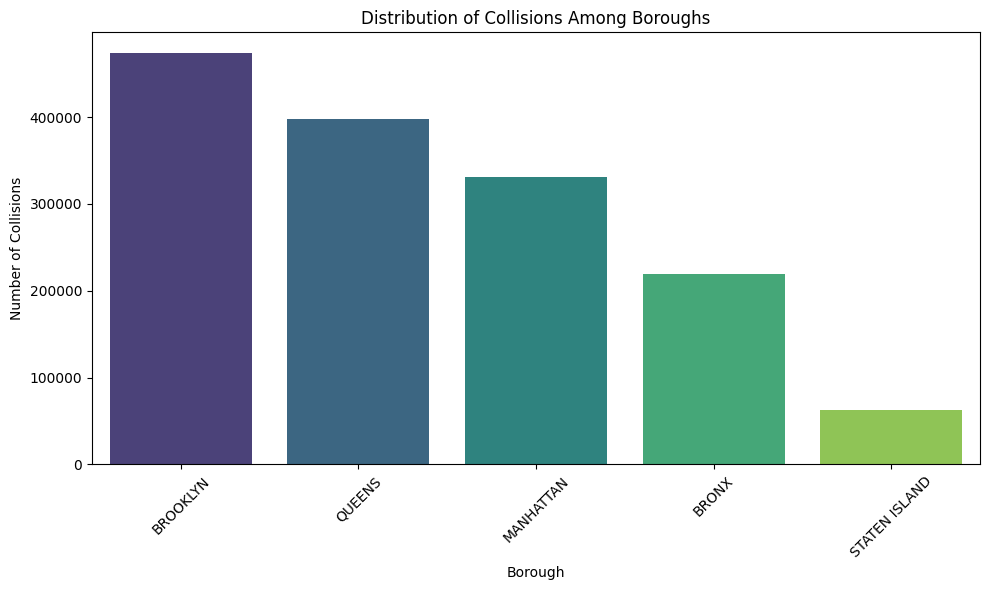

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'BOROUGH' and count the number of collisions
collisions_per_borough = df['BOROUGH'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=collisions_per_borough.index, y=collisions_per_borough.values, palette='viridis')
plt.title('Distribution of Collisions Among Boroughs')
plt.xlabel('Borough')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

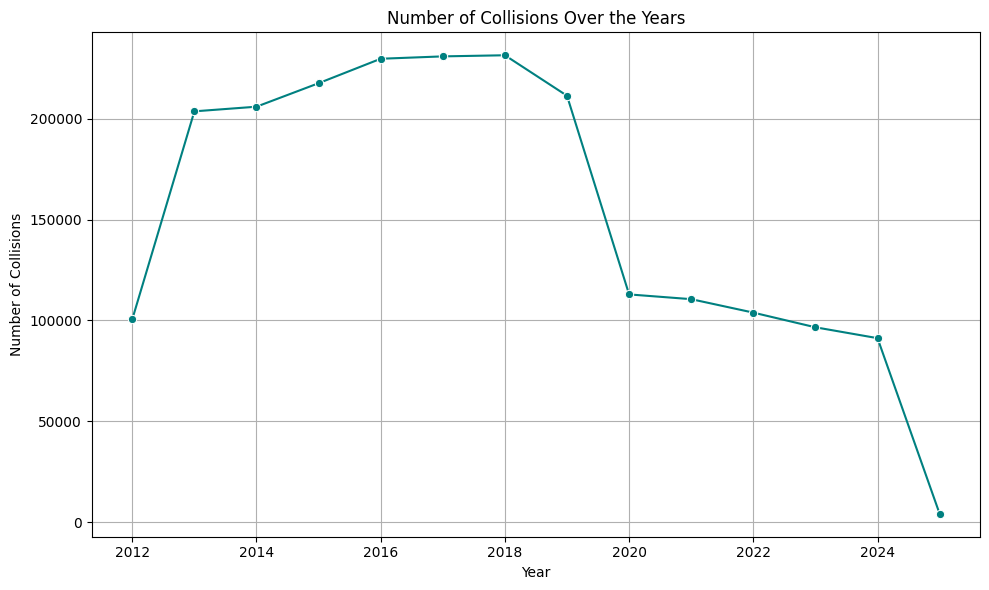

In [4]:
# Convert 'CRASH DATE' to datetime and extract the year
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['Year'] = df['CRASH DATE'].dt.year

# Group by year and count the number of collisions
collisions_per_year = df.groupby('Year')['COLLISION_ID'].count()

plt.figure(figsize=(10, 6))
sns.lineplot(x=collisions_per_year.index, y=collisions_per_year.values, marker='o', color='teal')
plt.title('Number of Collisions Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# Extract the hour and day of the week from 'CRASH TIME' and 'CRASH DATE'
df['Hour'] = df['CRASH TIME'].str[:2].astype(int)
df['Day_of_Week'] = df['CRASH DATE'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Create a pivot table to count collisions for each hour and day of the week
collision_heatmap_data = df.pivot_table(index='Day_of_Week', columns='Hour', values='COLLISION_ID', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(collision_heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Collisions'})
plt.title('Number of Collisions by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week (0=Mon, 6=Sun)')
plt.tight_layout()
plt.show()

ValueError: invalid literal for int() with base 10: '2:'

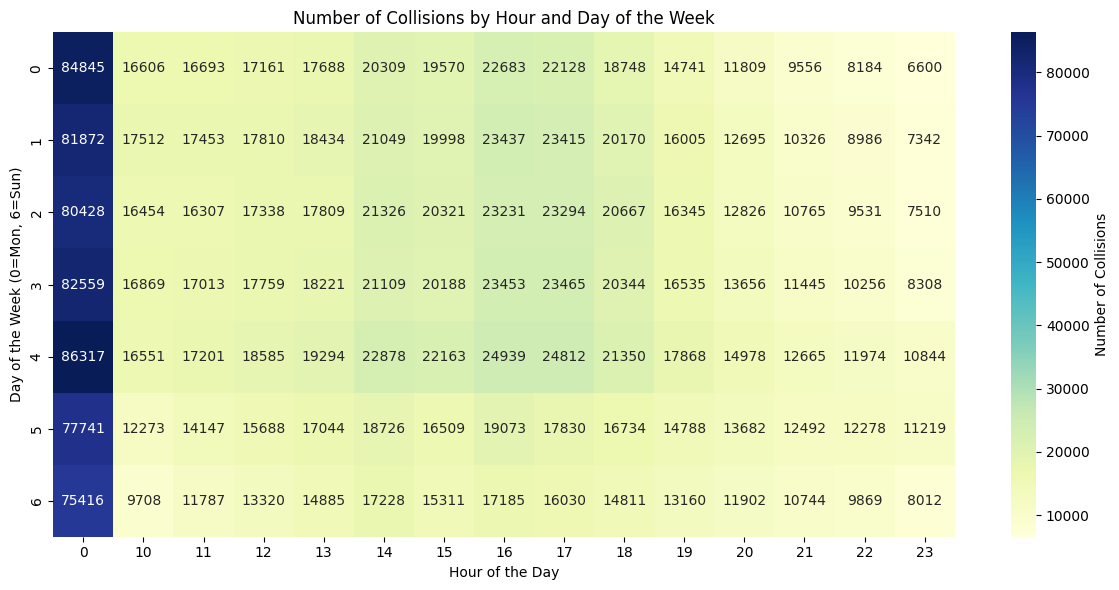

In [6]:
# Clean the 'CRASH TIME' column to make sure all values follow 'HH:MM' format
df['CRASH TIME'] = df['CRASH TIME'].str.extract(r'(\d{2}):(\d{2})')[0]

# Convert the 'CRASH TIME' column to integer values for hours
df['Hour'] = pd.to_numeric(df['CRASH TIME'], errors='coerce')

# Extract the day of the week
df['Day_of_Week'] = df['CRASH DATE'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Check for any NaN values in 'Hour' and handle them
df['Hour'] = df['Hour'].fillna(0).astype(int)

collision_heatmap_data = df.pivot_table(index='Day_of_Week', columns='Hour', values='COLLISION_ID', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(collision_heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of Collisions'})
plt.title('Number of Collisions by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week (0=Mon, 6=Sun)')
plt.tight_layout()
plt.show()


###Need to fix to include hours 1-9

###Fixed version:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-5-aeba9533c734>:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


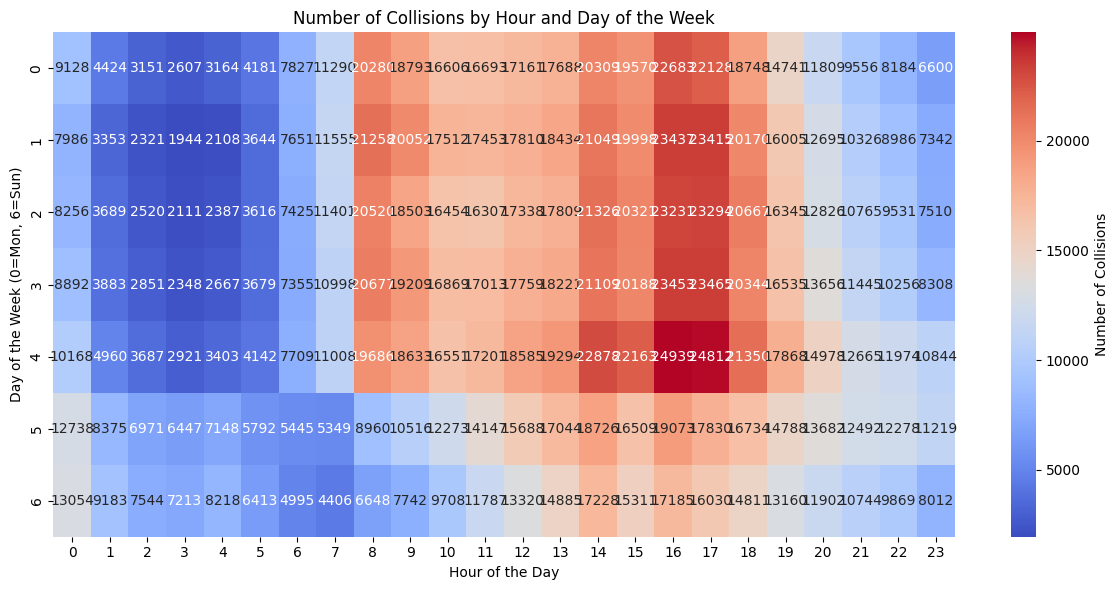

In [5]:
# Ignore new mount, code was being finicky and wanted me to re-mount the dataset
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Motor_Vehicle_Collisions_-_Crashes_20250127.csv'
df = pd.read_csv(file_path)

df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')
df['CRASH TIME'] = df['CRASH TIME'].str.extract(r'(\d{1,2}):\d{2}')[0]
df['Hour'] = pd.to_numeric(df['CRASH TIME'], errors='coerce')
df['Day_of_Week'] = pd.to_datetime(df['CRASH DATE']).dt.dayofweek
df['Hour'] = df['Hour'].fillna(0).astype(int)

collision_heatmap_data = df.pivot_table(
    index='Day_of_Week',
    columns='Hour',
    values='COLLISION_ID',
    aggfunc='count',
    fill_value=0
)

all_hours = list(range(24))
collision_heatmap_data = collision_heatmap_data.reindex(columns=all_hours, fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(collision_heatmap_data, cmap='coolwarm', annot=True, fmt='d', cbar_kws={'label': 'Number of Collisions'})
plt.title('Number of Collisions by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week (0=Mon, 6=Sun)')
plt.tight_layout()
plt.show()

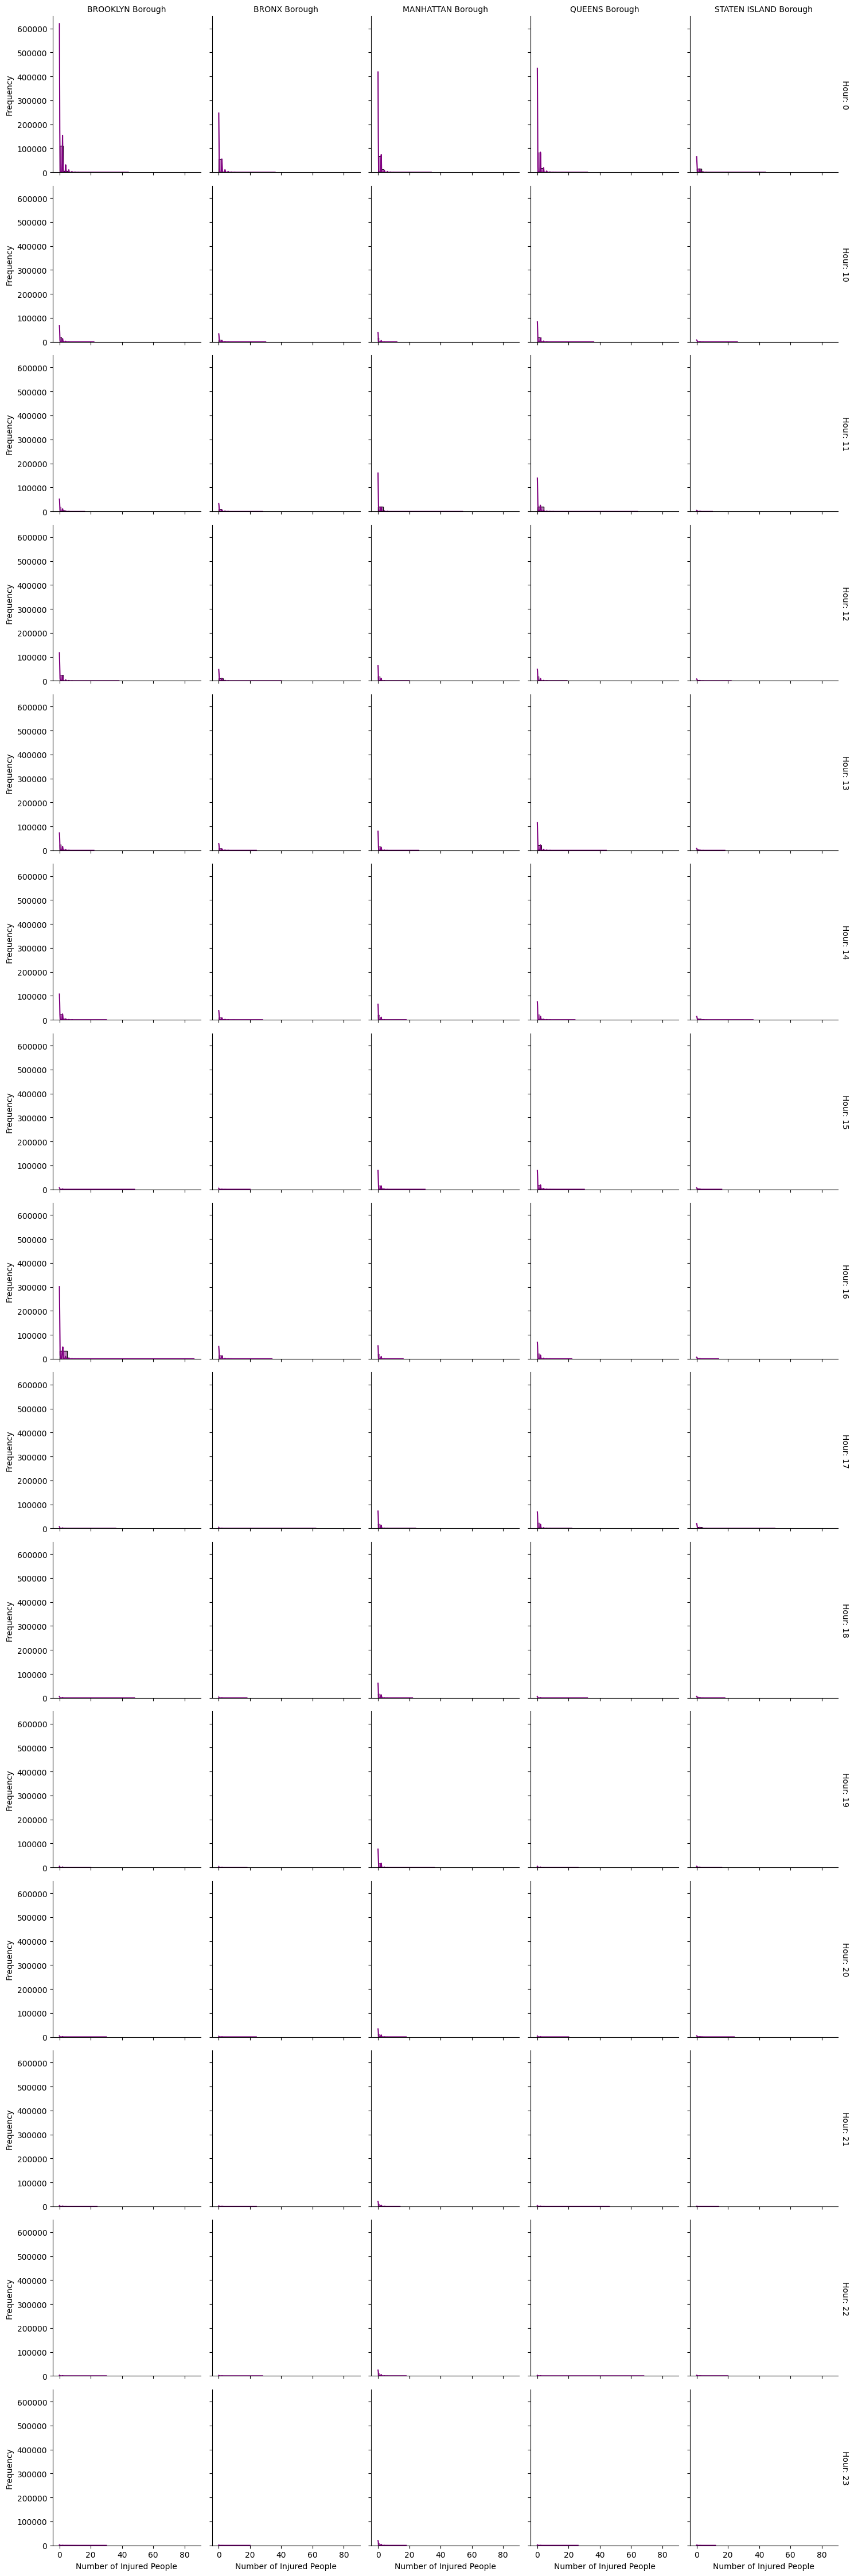

In [7]:
# Create a new column for the total number of injured people
df['Total_Injured'] = df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED']].sum(axis=1)

# Facet grid
g = sns.FacetGrid(df, col='BOROUGH', row='Hour', margin_titles=True, height=3)
g.map(sns.histplot, 'Total_Injured', kde=True, color='purple')
g.set_axis_labels('Number of Injured People', 'Frequency')
g.set_titles(row_template='Hour: {row_name}', col_template='{col_name} Borough')
g.tight_layout()
plt.show()

###Need to fix to include hours 1-9

###Fixed version:

In [8]:
# Check unique hours in the 'Hour' column
print(df['Hour'].unique())

[ 0 11 12 17 21 14 16 23 20 19 22 10 15 13 18]


In [9]:
# Ensure 'Hour' has all values from 0 to 23, even if there are no collisions for some hours
all_hours = list(range(24))
all_boroughs = df['BOROUGH'].unique()

# Create a new DataFrame to fill missing hour-borough combinations
all_combinations = pd.MultiIndex.from_product([all_boroughs, all_hours], names=['BOROUGH', 'Hour'])
df_complete = pd.DataFrame(index=all_combinations).reset_index()

# Merge with the original DataFrame, filling missing values with NaN
df = pd.merge(df_complete, df, on=['BOROUGH', 'Hour'], how='left')

# Recalculate Total_Injured for missing rows
df['Total_Injured'] = df[['NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED']].sum(axis=1)


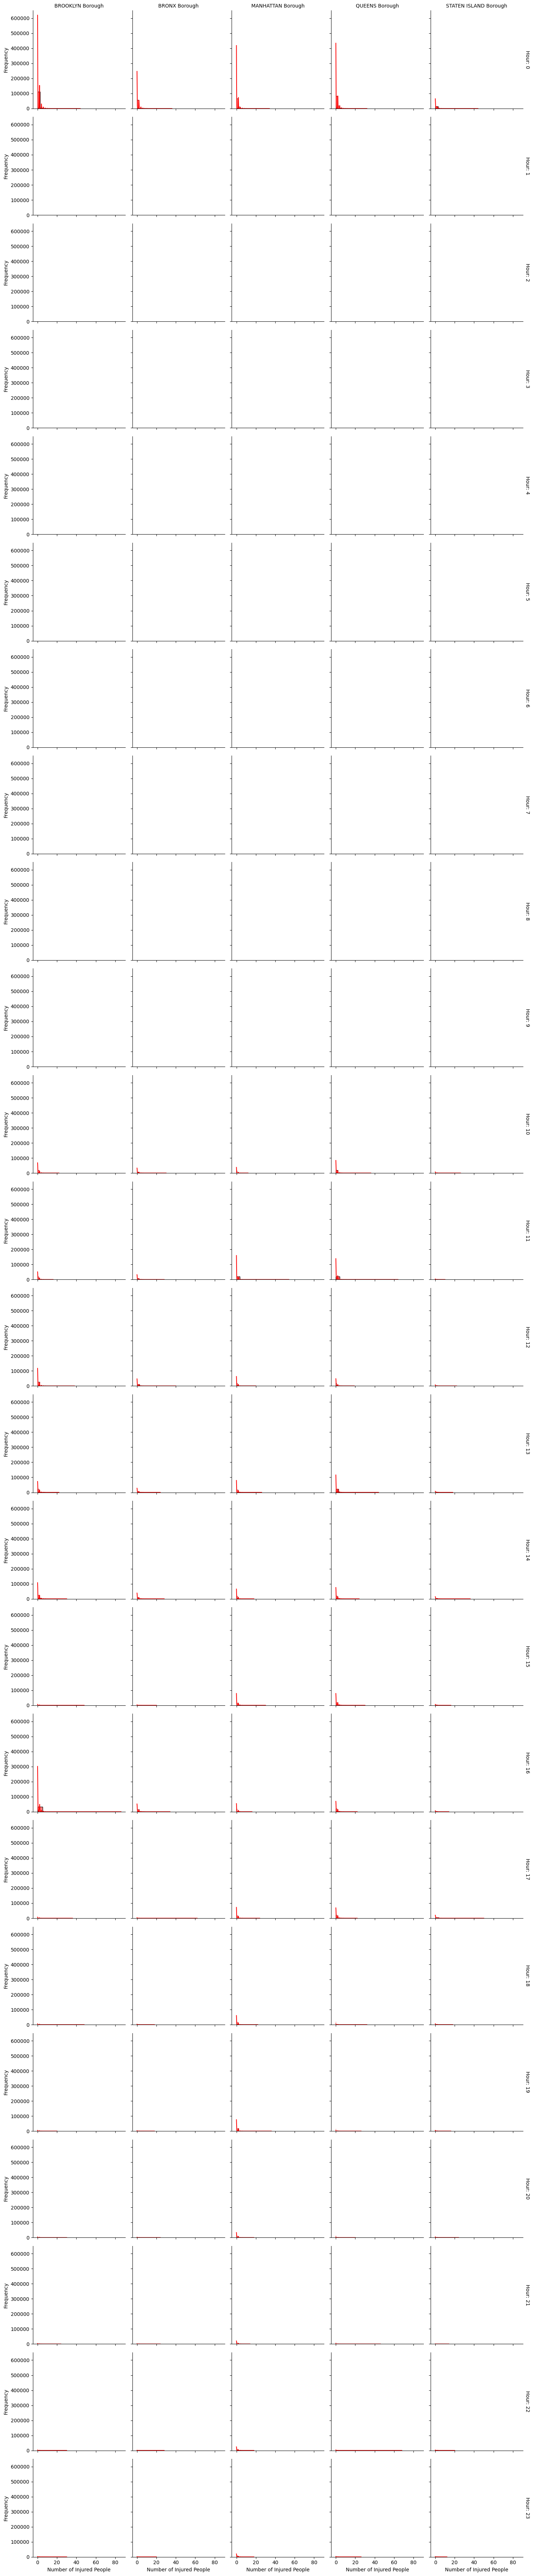

In [11]:
# Facet grid with all hours
g = sns.FacetGrid(df, col='BOROUGH', row='Hour', margin_titles=True, height=3)
g.map(sns.histplot, 'Total_Injured', kde=True, color='red')
g.set_axis_labels('Number of Injured People', 'Frequency')
g.set_titles(row_template='Hour: {row_name}', col_template='{col_name} Borough')
g.tight_layout()
plt.show()